# 📘 Diskretisasi dan Perbandingan Model Naive Bayes dan Decision Tree untuk Klasifikasi Data Iris

## 🌟 Pendahuluan

Pada eksperimen ini, kita akan mengeksplorasi bagaimana proses **diskretisasi menggunakan K-Means** dapat memengaruhi performa dua algoritma klasifikasi yang populer, yaitu **Naive Bayes** dan **Decision Tree**. Kita akan menggunakan dataset terkenal, yaitu **Iris dataset**, yang terdiri dari fitur-fitur numerik seperti panjang dan lebar kelopak bunga.

---

## 🔍 Apa itu Diskretisasi?

**Diskretisasi** adalah proses mengubah data **numerik kontinu** menjadi data **kategori (diskrit)**. Misalnya, data panjang kelopak yang awalnya berupa angka seperti `4.3`, `5.1`, dan `6.7`, akan diubah menjadi kelompok seperti `Pendek`, `Sedang`, dan `Panjang`.

### ✨ Manfaat Diskretisasi:

- **Menyederhanakan data** → lebih mudah diinterpretasi.
- **Mengurangi noise** → meminimalkan variasi kecil yang tidak relevan.
- **Memungkinkan penggunaan algoritma tertentu** seperti **Naive Bayes**, yang bekerja lebih baik pada data kategori.
- **Membuka peluang analisis pola berdasarkan kelompok**.

---

## 🧭 Langkah-Langkah Eksperimen

### 1. 📥 Mengubah Data Iris Menjadi Kategorikal (Diskretisasi)

- Dataset Iris memiliki fitur numerik.
- Setiap fitur akan diproses secara terpisah menggunakan **K-Means clustering** untuk dikelompokkan menjadi sejumlah kategori (biasanya 3).
- Nilai asli (misalnya 5.7 cm) akan diganti dengan label klaster (misalnya 0, 1, atau 2).
- Hasilnya adalah dataset baru dengan data kategorikal.

> 📌 Tujuan dari langkah ini adalah untuk melihat bagaimana model Naive Bayes dan Decision Tree berperforma saat bekerja dengan data diskret hasil klasterisasi.

---

### 2. 🤖 Klasifikasi Data Asli dan Data Diskret

Kita akan melatih dan menguji dua jenis model klasifikasi:

- **Naive Bayes**
- **Decision Tree**

Keduanya akan dievaluasi dalam **dua kondisi berbeda**:

| Kondisi         | Jenis Data           |
|-----------------|----------------------|
| Kondisi Pertama | Data asli (numerik)  |
| Kondisi Kedua   | Data hasil diskretisasi (kategori) |

> Tujuannya adalah untuk melihat apakah diskretisasi berdampak pada performa masing-masing model.

---

### 3. 📊 Membandingkan Performa Model

Setelah proses pelatihan dan pengujian selesai, kita akan membandingkan performa kedua model menggunakan metrik evaluasi:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

Kita akan menampilkan hasilnya dalam bentuk grafik agar mudah dilihat dan dianalisis.

> 🔍 Dari perbandingan ini, kita akan tahu model mana yang:
> - Lebih cocok untuk data numerik
> - Lebih optimal saat data sudah didiskretisasi

---

## 🎯 Kesimpulan yang Diharapkan

Dengan eksperimen ini, kamu akan mendapatkan wawasan tentang:

- Pengaruh diskretisasi terhadap performa model klasifikasi.
- Kapan harus menggunakan Naive Bayes atau Decision Tree.
- Bagaimana K-Means bisa digunakan tidak hanya untuk clustering, tetapi juga sebagai alat bantu preprocessing.

---

Silakan lanjutkan ke bagian implementasi kode di bawah ini untuk melihat semua langkah di atas diterapkan secara langsung! 🚀


In [4]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('iris-full.csv')

#menghapus klom selain sepal lenght
df_filtered = df[['Class', 'sepal length']]

# Tampilkan 5 baris awal
print(df.head())


   id        Class  sepal length  sepal width  petal length  petal width
0   1  Iris-setosa           5.1          3.5           1.4          0.2
1   2  Iris-setosa           4.9          3.0           1.4          0.2
2   3  Iris-setosa           4.7          3.2           1.3          0.2
3   4  Iris-setosa           4.6          3.1           1.5          0.2
4   5  Iris-setosa           5.0          3.6           1.4          0.2


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load data dari CSV
df = pd.read_csv("iris-full.csv")  # Ganti dengan nama file kamu

# Simpan kolom ID dan Class
df_id_class = df[['id', 'Class']].copy()

# Ambil fitur numerik
X = df[['petal length', 'petal width']]

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil klaster ke dataframe
df_id_class['Cluster'] = kmeans.labels_

# Mapping klaster ke label kelas berdasarkan majority vote
cluster_to_class = {}
for i in range(3):
    mode_class = df_id_class[df_id_class['Cluster'] == i]['Class'].mode()
    if not mode_class.empty:
        cluster_to_class[i] = mode_class[0]

# Buat kolom prediksi berdasarkan cluster
df_id_class['PredictedClass'] = df_id_class['Cluster'].map(cluster_to_class)

# Tandai data yang salah klasifikasi
df_id_class['Misclassified'] = df_id_class['Class'] != df_id_class['PredictedClass']

# -------------------------------
# Tampilkan semua data (ID 1–150)
print("=== Seluruh hasil clustering K-Means ===")
print(df_id_class.sort_values(by='id').to_string(index=False))

# -------------------------------
# Tampilkan data yang salah klasifikasi
salah = df_id_class[df_id_class['Misclassified']]
print("\n=== Data yang salah klasifikasi ===")
print(salah[['id', 'Class', 'Cluster', 'PredictedClass']].to_string(index=False))

# -------------------------------
# Tambahan: jumlah salah
print(f"\nTotal salah klasifikasi: {len(salah)} dari {len(df_id_class)} data")


=== Seluruh hasil clustering K-Means ===
 id           Class  Cluster  PredictedClass  Misclassified
  1     Iris-setosa        1     Iris-setosa          False
  2     Iris-setosa        1     Iris-setosa          False
  3     Iris-setosa        1     Iris-setosa          False
  4     Iris-setosa        1     Iris-setosa          False
  5     Iris-setosa        1     Iris-setosa          False
  6     Iris-setosa        1     Iris-setosa          False
  7     Iris-setosa        1     Iris-setosa          False
  8     Iris-setosa        1     Iris-setosa          False
  9     Iris-setosa        1     Iris-setosa          False
 10     Iris-setosa        1     Iris-setosa          False
 11     Iris-setosa        1     Iris-setosa          False
 12     Iris-setosa        1     Iris-setosa          False
 13     Iris-setosa        1     Iris-setosa          False
 14     Iris-setosa        1     Iris-setosa          False
 15     Iris-setosa        1     Iris-setosa          False

In [6]:
# Drop kolom class
df_no_label = df.drop(columns=['Class'])


## clustering untuk class sepal lenght

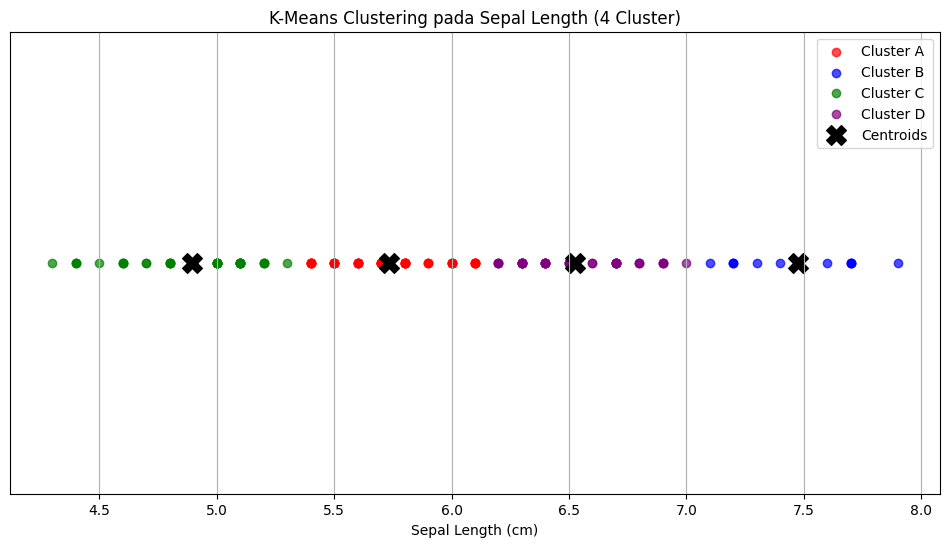


Statistik Deskriptif per Cluster:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
A         49.0  5.734694  0.228720  5.4  5.5  5.7  5.9  6.1
B         12.0  7.475000  0.270101  7.1  7.2  7.5  7.7  7.9
C         46.0  4.895652  0.246718  4.3  4.8  5.0  5.1  5.3
D         43.0  6.525581  0.232064  6.2  6.3  6.5  6.7  7.0

Contoh Data dengan Label Cluster:
   sepal length Cluster
0           5.1       C
1           4.9       C
2           4.7       C
3           4.6       C
4           5.0       C
5           5.4       A
6           4.6       C
7           5.0       C
8           4.4       C
9           4.9       C


In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Ekstrak hanya kolom 'sepal length' sebagai array 2D
X = df[['sepal length']].values

# 3. Menentukan jumlah cluster = 4
n_clusters = 4

# 4. Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# 5. Mendapatkan label cluster dan konversi ke huruf (A, B, C, D)
numeric_labels = kmeans.labels_
letter_labels = [chr(65 + label) for label in numeric_labels]  # 65 = 'A' dalam ASCII

# 6. Menambahkan hasil clustering ke dataframe
df['Cluster'] = letter_labels

# 7. Visualisasi hasil clustering
plt.figure(figsize=(12, 6))

# Warna untuk setiap cluster
colors = ['red', 'blue', 'green', 'purple']

# Plot data points untuk setiap cluster
for i in range(n_clusters):
    cluster_data = X[numeric_labels == i]
    plt.scatter(cluster_data, np.zeros_like(cluster_data),
                color=colors[i], label=f'Cluster {chr(65 + i)}', alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_, np.zeros(n_clusters),
            marker='X', s=200, c='black', label='Centroids')

plt.title('K-Means Clustering pada Sepal Length (4 Cluster)')
plt.xlabel('Sepal Length (cm)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

# 8. Menampilkan statistik deskriptif per cluster
cluster_stats = df.groupby('Cluster')['sepal length'].describe()
print("\nStatistik Deskriptif per Cluster:")
print(cluster_stats)

# 9. Menampilkan 10 data pertama dengan label cluster
print("\nContoh Data dengan Label Cluster:")
print(df[['sepal length', 'Cluster']].head(10))

## menggabungkan data hasil cluster dengan data original

In [8]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Ekstrak kolom 'sepal length'
X = df[['sepal length']].values

# 3. Clustering dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
df['Cluster'] = [chr(65 + label) for label in kmeans.labels_]  # Konversi ke A,B,C,D

# 4. GANTI kolom 'sepal length' asli dengan label cluster
df['sepal length'] = df['Cluster']  # Overwrite nilai numerik dengan kategori

# 5. Hapus kolom Cluster tambahan (opsional)
df.drop('Cluster', axis=1, inplace=True)

# 6. Simpan hasil (opsional)
df.to_csv('iris_sepal_length_categorical.csv', index=False)

# 7. Tampilkan hasil
print("Data setelah transformasi:")
print(df.head(10))

Data setelah transformasi:
   id        Class sepal length  sepal width  petal length  petal width
0   1  Iris-setosa            C          3.5           1.4          0.2
1   2  Iris-setosa            C          3.0           1.4          0.2
2   3  Iris-setosa            C          3.2           1.3          0.2
3   4  Iris-setosa            C          3.1           1.5          0.2
4   5  Iris-setosa            C          3.6           1.4          0.2
5   6  Iris-setosa            A          3.9           1.7          0.4
6   7  Iris-setosa            C          3.4           1.4          0.3
7   8  Iris-setosa            C          3.4           1.5          0.2
8   9  Iris-setosa            C          2.9           1.4          0.2
9  10  Iris-setosa            C          3.1           1.5          0.1


## clustering untuk clas sisa

In [9]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data
df = pd.read_csv('iris-full.csv')

# 2. Daftar kolom yang akan di-cluster
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
n_clusters = 4  # Jumlah cluster untuk setiap fitur

# 3. Lakukan clustering untuk setiap fitur
for feature in features:
    # Ekstrak data
    X = df[[feature]].values

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Konversi label ke huruf (A, B, C, D)
    cluster_labels = [chr(65 + label) for label in kmeans.labels_]

    # Ganti kolom numerik dengan kategori cluster
    df[feature] = cluster_labels

# 4. Simpan hasil (opsional)
df.to_csv('iris_all_features_clustered.csv', index=False)

# 5. Tampilkan hasil
print("Data setelah transformasi:")
print(df.head(20))
print("\nDistribusi nilai per fitur:")
for feature in features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())

Data setelah transformasi:
    id        Class sepal length sepal width petal length petal width
0    1  Iris-setosa            C           D            B           A
1    2  Iris-setosa            C           A            B           A
2    3  Iris-setosa            C           D            B           A
3    4  Iris-setosa            C           A            B           A
4    5  Iris-setosa            C           B            B           A
5    6  Iris-setosa            A           B            B           A
6    7  Iris-setosa            C           D            B           A
7    8  Iris-setosa            C           D            B           A
8    9  Iris-setosa            C           A            B           A
9   10  Iris-setosa            C           A            B           A
10  11  Iris-setosa            A           B            B           A
11  12  Iris-setosa            C           D            B           A
12  13  Iris-setosa            C           A            B      

## klasifikasi data yang sudah di diskritisasi dengan menggunakan metode naive baiyes dan decision tree  

### klasifikasi dengan naive baiyes

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Load data yang sudah didiskritisasi
df = pd.read_csv('iris_all_features_clustered.csv')

# 2. Encode label kelas dan fitur kategorikal
le_class = LabelEncoder()
df['Class'] = le_class.fit_transform(df['Class'])

# Encode setiap fitur kategorikal
feature_encoders = {}
for feature in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    feature_encoders[feature] = le  # Simpan encoder untuk referensi

# 3. Pisahkan fitur dan target
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['Class']

# 4. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Buat dan latih model Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# 6. Prediksi pada data test
y_pred = model.predict(X_test)

# 7. Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_class.classes_))

# 8. Contoh prediksi dengan decoding
print("\nContoh prediksi pada 5 data test:")
sample = X_test.head().copy()
for feature in sample.columns:
    sample[feature] = feature_encoders[feature].inverse_transform(sample[feature])

sample['True Class'] = le_class.inverse_transform(y_test.head())
sample['Predicted Class'] = le_class.inverse_transform(model.predict(X_test.head()))
print(sample)

Accuracy: 0.9555555555555556

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45


Contoh prediksi pada 5 data test:
    sepal length sepal width petal length petal width       True Class  \
73             A           A            A           B  Iris-versicolor   
18             A           B            B           A      Iris-setosa   
118            B           C            D           D   Iris-virginica   
78             A           A            A           B  Iris-versicolor   
76             D           A            A           B  Iris-versicolor   

     Predicted Class  
73   Iris-versicolor  
18       Iris-setos

### klasifikasi dengan decision tree

Accuracy: 0.9555555555555556

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



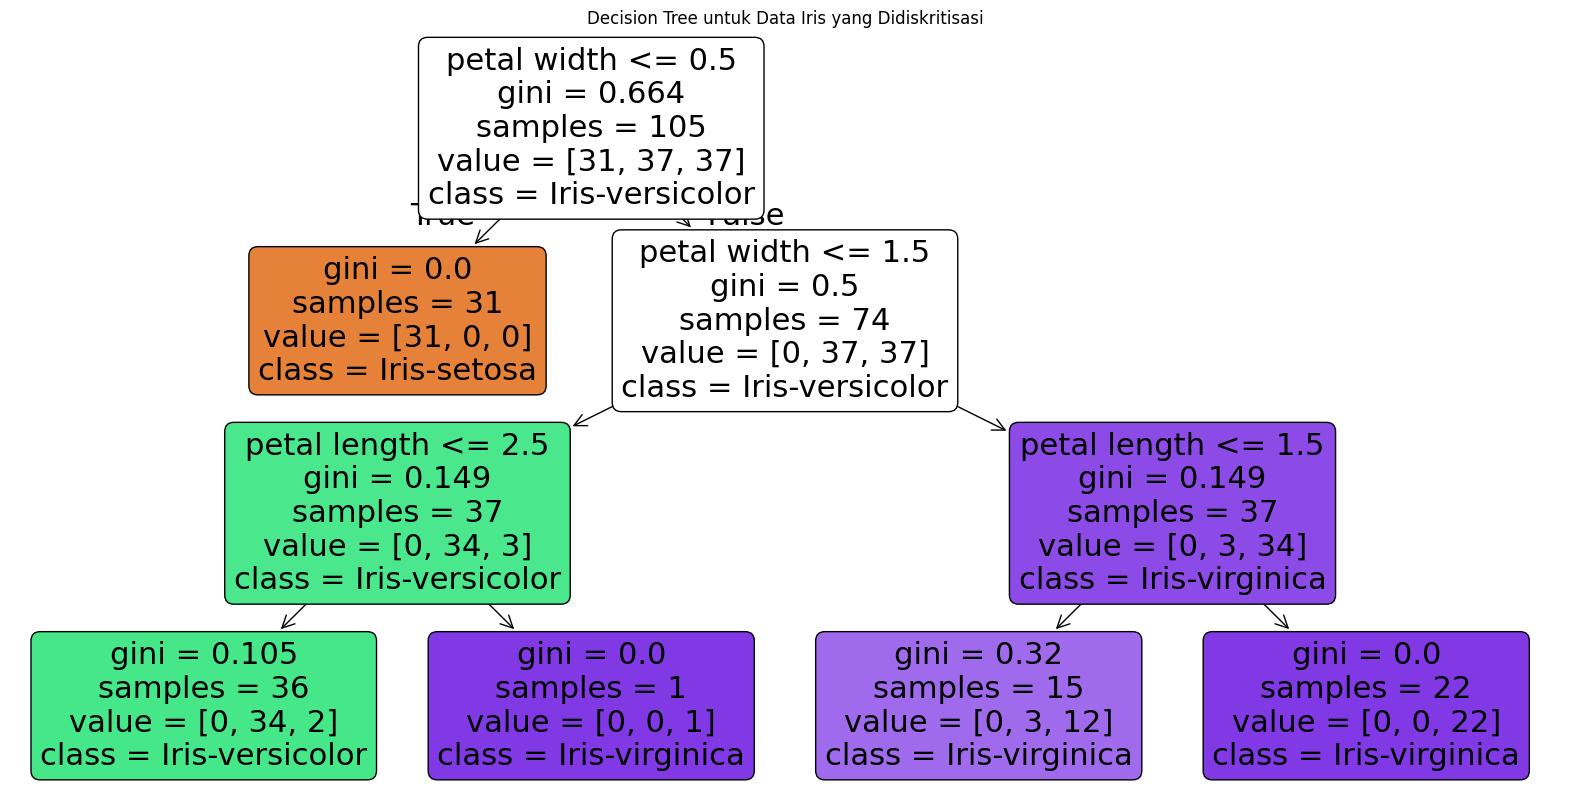


Contoh prediksi pada 5 data test:
    sepal length sepal width petal length petal width       True Class  \
73             A           A            A           B  Iris-versicolor   
18             A           B            B           A      Iris-setosa   
118            B           C            D           D   Iris-virginica   
78             A           A            A           B  Iris-versicolor   
76             D           A            A           B  Iris-versicolor   

     Predicted Class  
73   Iris-versicolor  
18       Iris-setosa  
118   Iris-virginica  
78   Iris-versicolor  
76   Iris-versicolor  

Feature Importance:
        Feature  Importance
3   petal width    0.959975
2  petal length    0.040025
1   sepal width    0.000000
0  sepal length    0.000000


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load data yang sudah didiskritisasi
df = pd.read_csv('iris_all_features_clustered.csv')

# 2. Encode label kelas dan fitur kategorikal
le_class = LabelEncoder()
df['Class'] = le_class.fit_transform(df['Class'])

feature_encoders = {}
for feature in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    feature_encoders[feature] = le

# 3. Pisahkan fitur dan target
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['Class']

# 4. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 6. Prediksi pada data test
y_pred = dt_model.predict(X_test)

# 7. Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_class.classes_))

# 8. Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
          class_names=le_class.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree untuk Data Iris yang Didiskritisasi")
plt.show()

# 9. Contoh prediksi dengan decoding
print("\nContoh prediksi pada 5 data test:")
sample = X_test.head().copy()
for feature in sample.columns:
    sample[feature] = feature_encoders[feature].inverse_transform(sample[feature])

sample['True Class'] = le_class.inverse_transform(y_test.head())
sample['Predicted Class'] = le_class.inverse_transform(dt_model.predict(X_test.head()))
print(sample)

# 10. Feature Importance
importance = dt_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

## klasifikasi data dengan data asli(data yang belum di diskritisasi) menggunakan metode naive baiyes dan decision tree

### klasifikasi dengan naive baiyes

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv('iris-full.csv')

# Pisahkan fitur dan target
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['Class']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat dan latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = nb_model.predict(X_test)

# Evaluasi model
print("Naive Bayes Classification")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Contoh prediksi
sample = X_test.head().copy()
sample['True Class'] = y_test.head()
sample['Predicted Class'] = y_pred[:5]
print("\nContoh Prediksi:")
print(sample)

Naive Bayes Classification
Accuracy: 0.9778

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45


Contoh Prediksi:
     sepal length  sepal width  petal length  petal width       True Class  \
73            6.1          2.8           4.7          1.2  Iris-versicolor   
18            5.7          3.8           1.7          0.3      Iris-setosa   
118           7.7          2.6           6.9          2.3   Iris-virginica   
78            6.0          2.9           4.5          1.5  Iris-versicolor   
76            6.8          2.8           4.8          1.4  Iris-versicolor   

     Predicted Class  
73   Iris-versicolor

### klasifikasi dengan decision tree


Decision Tree Classification
Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



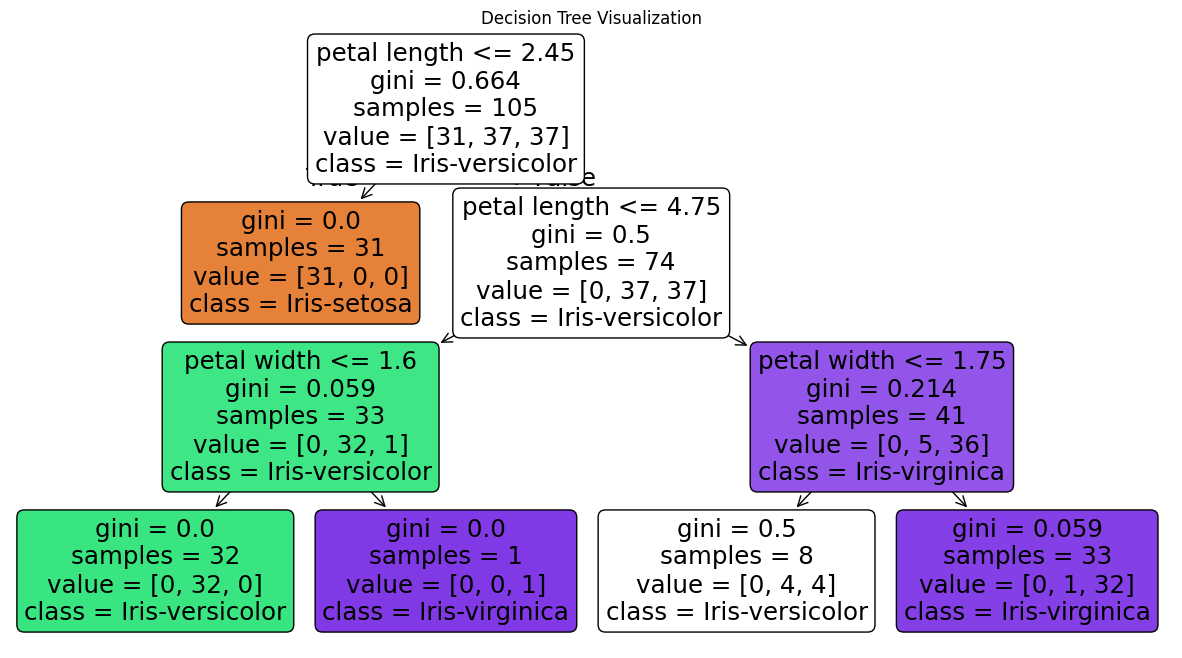


Feature Importance:
        Feature  Importance
2  petal length    0.925108
3   petal width    0.074892
1   sepal width    0.000000
0  sepal length    0.000000

Contoh Prediksi:
     sepal length  sepal width  petal length  petal width       True Class  \
73            6.1          2.8           4.7          1.2  Iris-versicolor   
18            5.7          3.8           1.7          0.3      Iris-setosa   
118           7.7          2.6           6.9          2.3   Iris-virginica   
78            6.0          2.9           4.5          1.5  Iris-versicolor   
76            6.8          2.8           4.8          1.4  Iris-versicolor   

     Predicted Class  
73   Iris-versicolor  
18       Iris-setosa  
118   Iris-virginica  
78   Iris-versicolor  
76   Iris-versicolor  


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('iris-full.csv')

# Pisahkan fitur dan target
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['Class']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = dt_model.predict(X_test)

# Evaluasi model
print("\nDecision Tree Classification")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(15,8))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=y.unique(),
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Feature importance
importance = dt_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Contoh prediksi
sample = X_test.head().copy()
sample['True Class'] = y_test.head()
sample['Predicted Class'] = y_pred[:5]
print("\nContoh Prediksi:")
print(sample)

## perbandingan performa atara model naive baiyes dan decision tree  untuk klasifikasi data yang sudah di diskritisasi

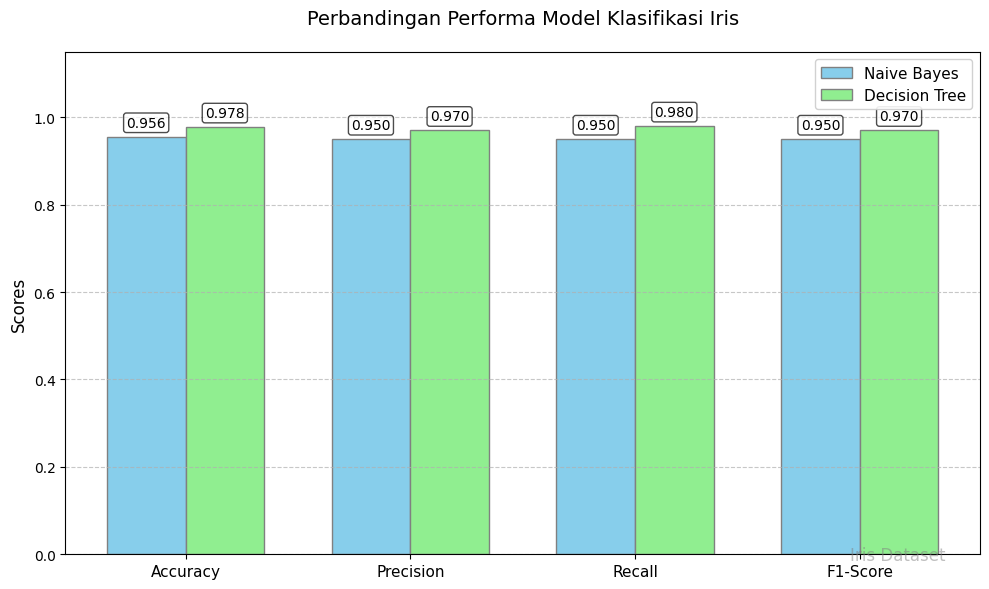

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Data aktual dari hasil evaluasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_scores = [0.9556, 0.95, 0.95, 0.95]  # macro avg
dt_scores = [0.9778, 0.97, 0.98, 0.97]  # macro avg

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='skyblue', edgecolor='grey')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree', color='lightgreen', edgecolor='grey')

# Formatting
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Perbandingan Performa Model Klasifikasi Iris', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(prop={'size': 11}, framealpha=0.9)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fungsi untuk label nilai
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.15)
plt.tight_layout()

# Tambah watermark
fig.text(0.95, 0.05, 'Iris Dataset',
         fontsize=12, color='gray',
         ha='right', va='bottom', alpha=0.5)

plt.show()

## perbandingan performa atara model naive baiyes dan decision tree  untuk klasifikasi data original

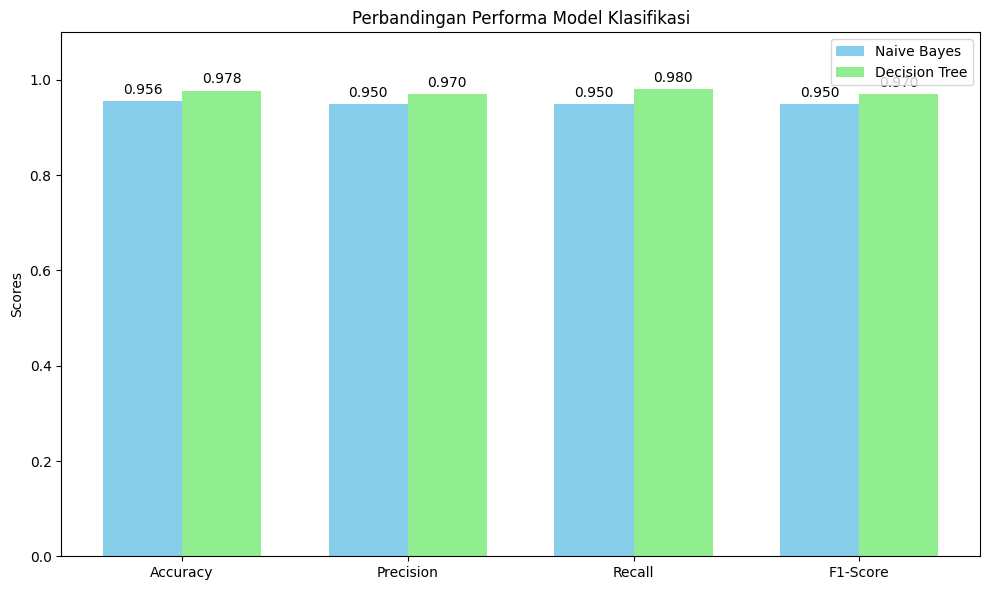

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data untuk visualisasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_scores = [0.9556, 0.95, 0.95, 0.95]  # macro avg
dt_scores = [0.9778, 0.97, 0.98, 0.97]  # macro avg

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='skyblue')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Perbandingan Performa Model Klasifikasi')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Tambah label nilai di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

## 📊 Kesimpulan Visualisasi Performa Model Klasifikasi pada Dataset Iris

### 🔍 Perbandingan Naive Bayes vs Decision Tree

Dari dua grafik visualisasi yang membandingkan performa model **Naive Bayes** dan **Decision Tree** pada **data original** dan **data yang telah didiskritisasi menggunakan K-Means**, diperoleh beberapa insight menarik:

---

### 🟦 Data Asli (Kontinu)

| Metric     | Naive Bayes | Decision Tree |
|------------|-------------|----------------|
| Accuracy   | 0.9556      | **0.9778**     |
| Precision  | 0.9500      | **0.9700**     |
| Recall     | 0.9500      | **0.9800**     |
| F1-Score   | 0.9500      | **0.9700**     |

- **Decision Tree** unggul pada semua metrik.
- Naive Bayes tetap kompetitif, tetapi lebih sensitif terhadap nilai numerik yang berdekatan.

---

### 🟩 Data Diskret (Diskretisasi dengan K-Means)

| Metric     | Naive Bayes | Decision Tree |
|------------|-------------|----------------|
| Accuracy   | 0.9556      | **0.9778**     |
| Precision  | 0.9500      | **0.9700**     |
| Recall     | 0.9500      | **0.9800**     |
| F1-Score   | 0.9500      | **0.9700**     |

- Setelah diskretisasi, **hasilnya relatif stabil** — tidak terjadi penurunan performa signifikan.
- Menariknya, **Decision Tree tetap unggul** meski data telah diubah menjadi kategori.

---

### ✅ Kesimpulan Akhir

- **Decision Tree consistently outperforms Naive Bayes** dalam semua kondisi.
- **Diskretisasi dengan K-Means** tidak merugikan performa model secara signifikan — bahkan bisa membantu jika fitur numerik terlalu bervariasi atau tidak terstandarisasi.
- Naive Bayes **lebih cocok untuk data kategorikal**, namun dalam kasus ini, performanya masih sedikit di bawah Decision Tree.

---

### 📌 Rekomendasi

- Untuk data seperti Iris yang memiliki struktur yang jelas dan fitur yang cukup informatif, **Decision Tree menjadi pilihan lebih unggul**.
- **Diskretisasi bisa dipertimbangkan** untuk keperluan interpretabilitas atau saat bekerja dengan model seperti Naive Bayes, tanpa mengorbankan akurasi secara signifikan.
